In [68]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

First reading the dataframe using pandas

In [69]:
df1=pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [70]:
df1.shape

(13320, 9)

In [71]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [72]:
df1.groupby('area_type')['area_type'].count()

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


We can remove the features(columns) that are not required, so here we are removing four features that are unnecessory for the prediction of the price data

In [73]:
df2=df1.drop(['area_type',	'availability','society','balcony'],axis=1)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


Once we get the required data we have to start the data cleaning process

## Data cleaning

In [74]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


The rows holding null values here are very less comparing with our data set so we can just remove these null values.
If there are more null values then we have to replace those values with the specified values like mean or median or any other value which will be fit enough for the data.

In [75]:
 df3=df2.dropna()
 df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [76]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

The size columns holds the no.of bedrooms in the house.The data here is uneven for example '2 BHK' and '4 bedroom' these represent the bedrooms but still these are uneven.So using split() method we create a new column which shows only the int bedrooms.

In [77]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3['bhk'].unique()

<ipython-input-77-9e0bf55b3f54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [78]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


There might be an error as sqr feet is lesser for 40 bedroom house,we clean these errors further.

In [79]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Here we can see that the total_sqft column is filled with some range values and other unit values in them so we have to fix them.Using the below function we return True if it is normal float and we return false if it is a range or if it does contain any text in them etc...

In [80]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

How it works:
try:

The code attempts to convert x to a floating-point number using float(x).

except:

If the conversion fails (for example, if x is a string like "abc" or None), Python raises an exception.

The except block catches any error and returns False, meaning x is not a float.

return True

If no error occurs, it means x can be converted to a float, so it returns True.

In [81]:
df3[~df3['total_sqft'].apply(is_float)]
# These are the values that have total sqr feet in range
#the negation converts the boolean value to its opposite

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [82]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


How below function works:
Splitting by '-'

x.split('-') breaks the string at -.

Example: '1000-1200' → ['1000', '1200'].

If it's a range (2 values)

Convert both to floats and return the average.

((1000 + 1200) / 2) = 1100.0

If it's a single value (no -)

Try converting it directly to float.

'1050' → 1050.0

If conversion fails (e.g., '34.46Sq. Meter')

Return None.

In [83]:
def convert_total_sqft_range(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return ((float(tokens[0])+float(tokens[1]))/2)
  try:
    return float(x)
  except:
    return None

In [84]:
convert_total_sqft_range('2100-2850')

2475.0

In [85]:
convert_total_sqft_range('2100')

2100.0

Below code returns none

In [86]:
convert_total_sqft_range('34.46Sq. Meter')

In [87]:
df3.shape

(13246, 6)

Now create a new DataFrame with the converted values of total_sqft column.
Here we can give function directly into the apply() method or we can also use lambda format for applying into each element.

In [88]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_total_sqft_range)
df4.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


In [89]:
(2100 + 2850)/2

2475.0

we can see the above values match means our function works well.

In [90]:
df4.loc[410]

,410
location,Kengeri
size,1 BHK
total_sqft,NaN
bath,1.0
price,18.5
bhk,1


In [91]:
df4.isnull().sum()

,0
location,0
size,0
total_sqft,46
bath,0
price,0
bhk,0


In [92]:
df5=df4.dropna()

In [93]:
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


As we generally while buying a house we look into the cost per sqft value , so here we are creating a new column that give that value.The unit of price is lakhs so here we multiply one lakh to convert to normal cost.

In [94]:
df6=df5.copy()
df6['price_per_sqft']=df6['price']*100000/df6['total_sqft']
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Now lets look into the location column and try to filter it.

In [95]:
len(df6.location.unique())

1298

Very high dimensions which is dimensionlity curse.when we convert into one hot encoding then there will be problem.strip( ) removes leading and trailing spaces from every value in the location column of the DataFrame df5.

Lets just covert all the location points which have occured less than 10 times into other section

In [96]:
df6.location = df6.location.apply(lambda x: x.strip())
location_stats=df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,533
Sarjapur Road,392
Electronic City,304
Kanakpura Road,264
Thanisandra,235
...,...
"beml layout, basaveshwara nagar",1
basaveshwarnagar,1
1 Giri Nagar,1


In [97]:
len(location_stats[location_stats<=10])

1047

In [98]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
1st Block Koramangala,10
Thyagaraja Nagar,10
Ganga Nagar,10
Nagappa Reddy Layout,10
Gunjur Palya,10
...,...
"beml layout, basaveshwara nagar",1
basaveshwarnagar,1
1 Giri Nagar,1


In [99]:
len(df6.location.unique())

1287

In [100]:
df6['location']=df6.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.location.unique())

241

In [101]:
df6.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


#### outlier removal

#### total_sqft outlier

Generally the sqft/bhk value will be greater than 300 so here we handle values which do not satisfy this requirement

In [102]:
df6[df6.total_sqft/df6.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [103]:
df6.shape

(13200, 7)

In [104]:
df7=df6[~(df6.total_sqft/df6.bhk<300)]
df7.shape

(12456, 7)

#### price_per_sqft outlier

In [105]:
df7.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [106]:
df7.groupby('location')['price_per_sqft'].agg('mean')

,price_per_sqft
location,
1st Block Jayanagar,12359.253758
1st Phase JP Nagar,9726.405918
2nd Phase Judicial Layout,4048.701183
2nd Stage Nagarbhavi,14381.275720
5th Block Hbr Layout,6622.120076
...,...
Yelahanka,5204.894684
Yelahanka New Town,5860.659870
Yelenahalli,4012.550871


In [107]:
def remove_pps_outliers(df):
  out_df=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=subdf.price_per_sqft.mean()
    std=subdf.price_per_sqft.std()
    reduced_df=subdf[(subdf.price_per_sqft<(m+std)) & (subdf.price_per_sqft>(m-std))]
    out_df=pd.concat([out_df,reduced_df])
  return out_df

df.groupby('location'):

This groups the DataFrame df by the values in the 'location' column.

It returns pairs of (key, subdf):

key: A unique value from the location column (e.g., "Yelahanka", "Yeshwanthpur").

subdf: A DataFrame that includes only the rows where location == key.

How the above function works:

Groups the data by location.

For each group:

Calculates mean and standard deviation of price_per_sqft.

Keeps only the values within 1 standard deviation of the mean.

Combines the cleaned data into a new DataFrame.

Returns this cleaned DataFrame.

In [108]:
df8 = remove_pps_outliers(df7)
df8.shape

(10293, 7)

#### bhk outlier

Let's look into the scatter plot between 2bhk and 3bhk for same location and see how these varies.

In [109]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

How the above function works:

Filters the DataFrame:

bhk2: All 2 BHK properties in the specified location.

bhk3: All 3 BHK properties in that location.

matplotlib.rcParams['figure.figsize'] = (15, 10)

This line sets the default size of the plot figure using Matplotlib.

matplotlib.rcParams: A dictionary that holds default settings for Matplotlib plots.

'figure.figsize': Controls the width and height of the figure (in inches).

(15, 10): Means the figure will be 15 inches wide and 10 inches tall.


2 BHK → Blue dots

3 BHK → Green “+” markers

Each plot shows:

x-axis: total_sqft

y-axis: price

Adds labels and legend for clarity.

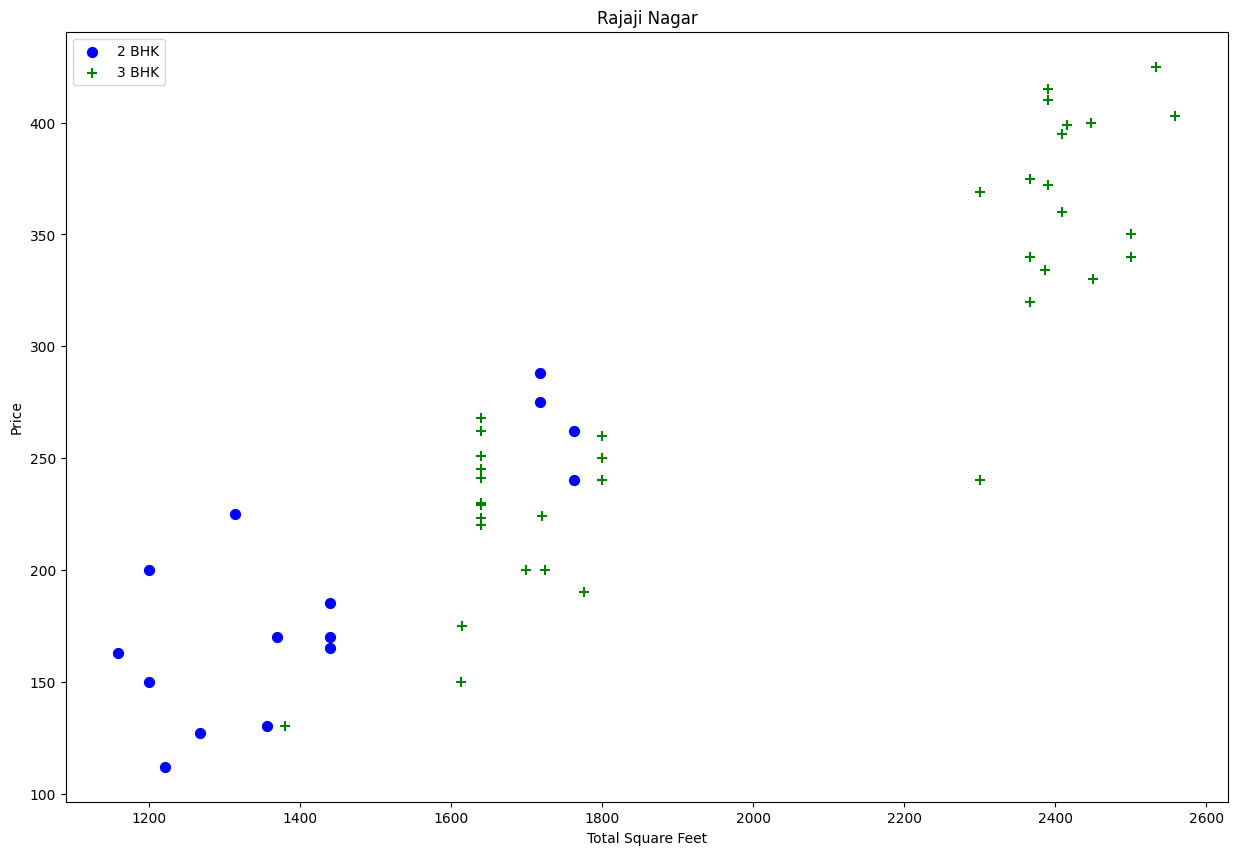

In [110]:
plot_scatter_chart(df8,'Rajaji Nagar')

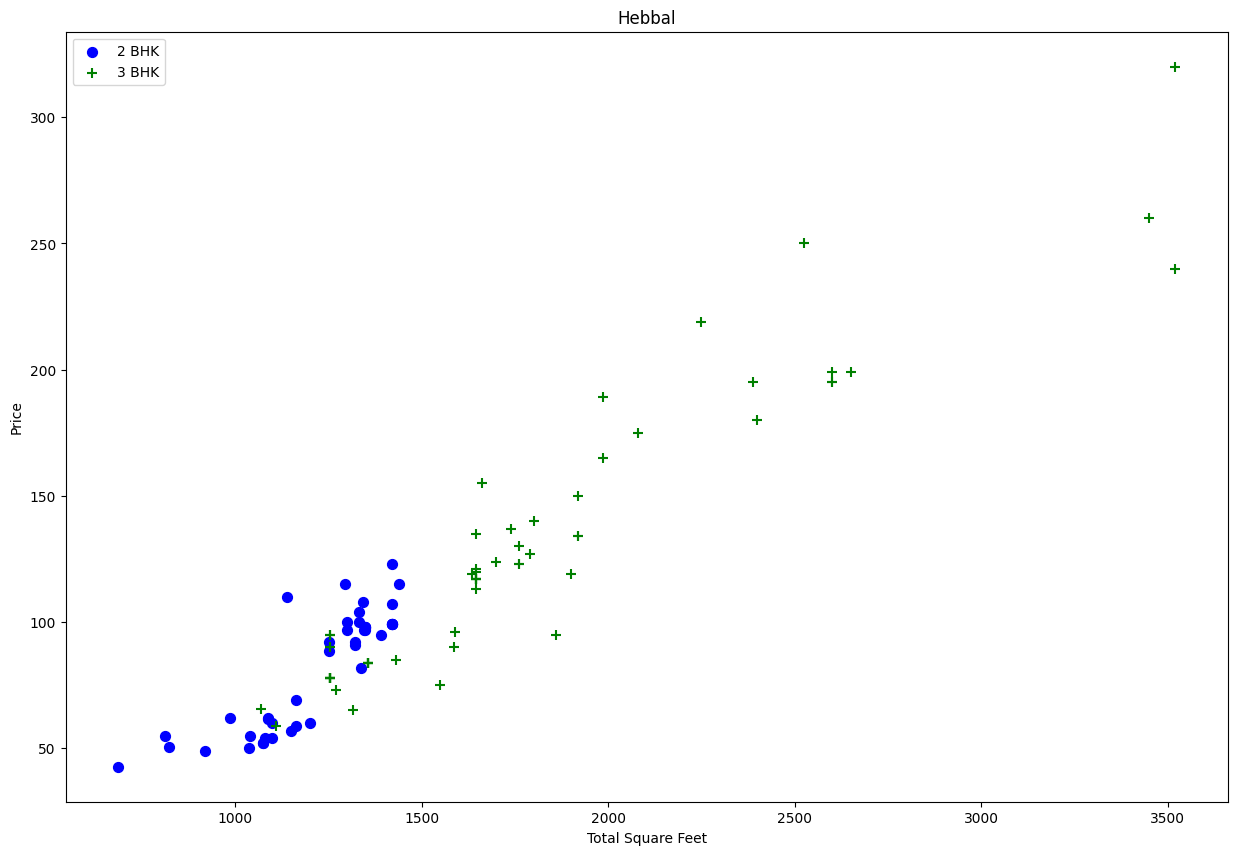

In [111]:
plot_scatter_chart(df8,'Hebbal')

In the above scatter plot we can clearly see some of  green points i.e, 3bhk price is lesser than 2bhk in same area which must be treated.  

In [112]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': bhk_df.price_per_sqft.mean(),
                'std': bhk_df.price_per_sqft.std(),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)

    return df.drop(exclude_indices, axis='index')

How the above function works:

Step 1: Initialize storage for outliers

exclude_indices = np.array([ ])
This creates an empty NumPy array to store the indexes (row numbers) of the outlier entries we want to remove.

Step 2: Loop through each location

for location, location_df in df.groupby('location'):
This loops through the dataset grouped by location. So, for each location like "Whitefield" or "Indiranagar",

it:
Gets location_df, which contains all properties in that specific location.

Step 3: Create statistics for each BHK in that location



for bhk, bhk_df in location_df.groupby('bhk') :

    bhk_stats[bhk] = {
                'mean': bhk_df.price_per_sqft.mean(),
                'std': bhk_df.price_per_sqft.std(),
                'count': bhk_df.shape[0]
            }
Inside each location:

It further groups the data by bhk (number of bedrooms).

For each bhk, it calculates:

mean: average price per sqft

std: standard deviation

count: how many entries there are

It saves these stats in the dictionary bhk_stats.

🔸 Example:
Suppose in "Whitefield":

2 BHK: mean ₹5000, std ₹400, count 20

3 BHK: mean ₹4700, std ₹600, count 15

🔹 Step 4: Identify outlier 3+ BHK flats

for bhk, bhk_df in location_df.groupby('bhk'):

    stats = bhk_stats.get(bhk - 1)
    if stats and stats['count'] > 5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
Now the function loops again through the same BHK groups in that location.

For each BHK (say 3 BHK), it looks at the (BHK - 1) stats (e.g., 2 BHK).

It checks two conditions at once:

stats is not None

If there are more than 5 records of that (BHK - 1), it proceeds.

It then checks if any BHK property has a lower price_per_sqft than the mean of the smaller BHK.

For example, if a 3 BHK is cheaper per square foot than the average 2 BHK → not realistic → flagged.

Those rows' indices are added to exclude_indices.

🔹 Step 5: Remove those outliers from the DataFrame


return df.drop(exclude_indices, axis='index')

Finally, the function removes the rows at the exclude_indices from the original DataFrame and returns the cleaned data.

In [113]:
df9=remove_bhk_outliers(df8)
df9.shape

(7365, 7)

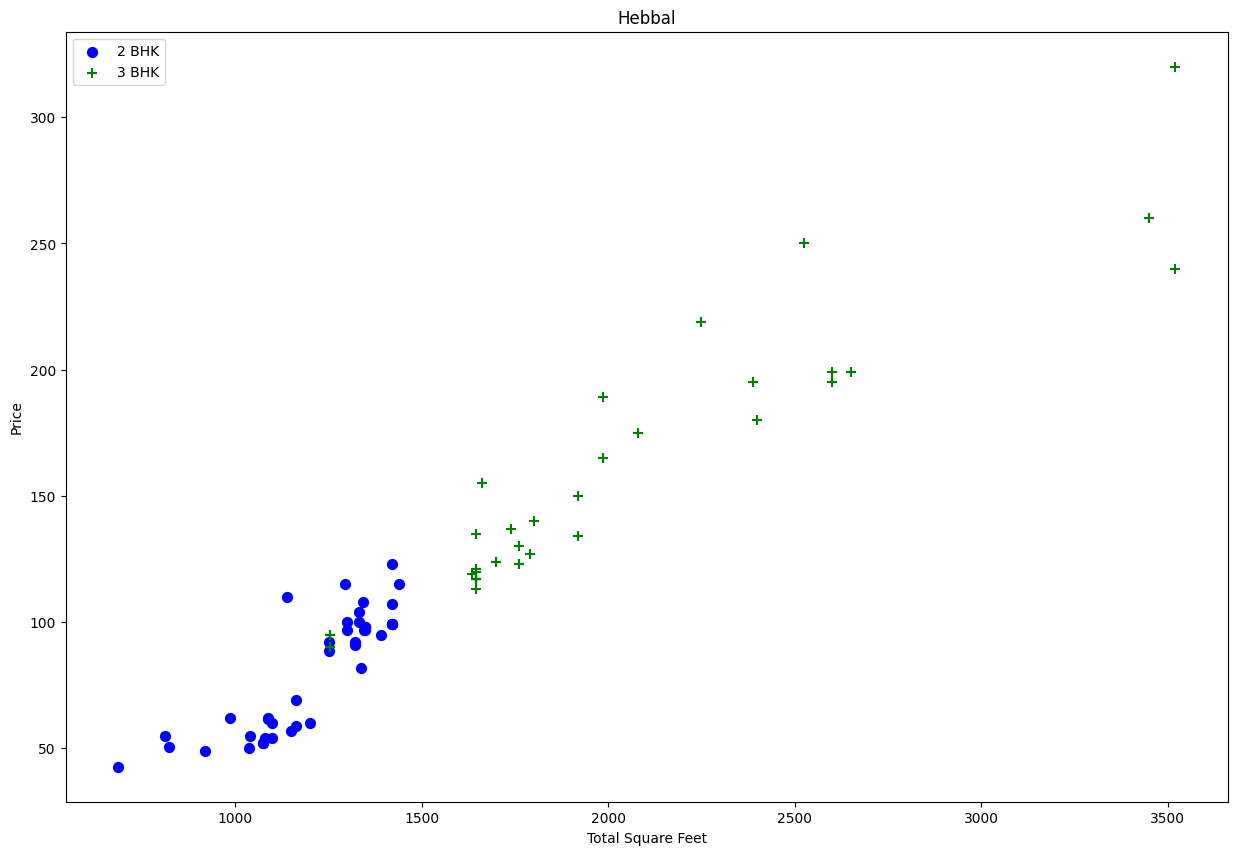

In [114]:
plot_scatter_chart(df9,'Hebbal')

#### bath outlier

It is also said that the number of bathrooms will not exceed the number of bedrooms with more than 2.So we have to remove which have excess bathroom

In [115]:
df9[df9.bath>df9.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [116]:
df10=df9[(df9.bath<df9.bhk+2)]
df9.shape

(7365, 7)

In [117]:
df11=df10.drop(['price_per_sqft','size'],axis=1)
df11.shape

(7286, 5)

## Machine Learning model

In [118]:
df11.head()

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,428.0,4
848,1st Block Jayanagar,1630.0,3.0,194.0,3
2152,1st Block Jayanagar,1875.0,2.0,235.0,3
7138,1st Block Jayanagar,1200.0,2.0,130.0,3
7358,1st Block Jayanagar,1235.0,2.0,148.0,2


We see here location is in text format but our machine learning model takes only in numbers so lets convert these using get_dummies( ) from pandas

In [119]:
dummies=pd.get_dummies(df11.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can drop one any location column from the dataframe after using get dummies.

In [120]:
df12=pd.concat([df11,dummies.drop(['other'],axis=1)],axis=1)
df12.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df13=df12.drop(['location'],axis=1)
df13.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
X=df13.drop(['price'],axis=1)
y=df13.price

#### Using Train_test_split

In [123]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [124]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8529894995402338

#### Using cross_val_score and GridSearchCV

In [125]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv).mean()

np.float64(0.8422425857411074)

In [126]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_model_using_gridsearchcv(X,y):
  algos={
      'linear_regression': {
          'model':LinearRegression(),
          'params': {}
      },
      'lasso': {
          'model':Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['random','cyclic']
          }
      },
      'decision_tree': {
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion':['mse','friedman_mse'],
              'splitter':['best','random']
          }
      }
  }

  scores=[]
  cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for algo_name,config in algos.items():
    gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(X,y)
    scores.append({
      'model':algo_name,
      'best_score':gs.best_score_,
      'best_params':gs.best_params_
    })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])


find_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,linear_regression,0.842243,{}
1,lasso,0.693753,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.713893,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#### Predict the values

As train_test_split model gives more score let's use that model for prediction

In [127]:
def predict_price(location,sqft,bath,bhk):
  loc_index=np.where(X.columns==location)[0][0]

  x=np.zeros(len(X.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  if loc_index>=0:
    x[loc_index]= 1

  return model.predict([x])[0]

Find location index:
It checks where the location is in the model's feature columns.

loc_index=np.where(X.columns==location)[0][0]

This above code line finds the column index that holds the name of the location that was given for prediction.

For example :

np.where(X.columns=='1st Block Jayanagar')[0][0]

gives output as 3

Create input array:
A zero-filled array is created with the same length as the number of model features.

Fill in basic features:
The first few values (like sqft, bath, bhk) are placed in their respective positions.

Set location one-hot:
If the location exists in the features, its position is set to 1 (for one-hot encoding).

Predict price:
The array is passed to the model to get the predicted price.

In [128]:
predict_price('Indira Nagar',1000,2,2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(181.28727974154634)

In [129]:
predict_price('Indira Nagar',1000,3,3)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(185.38066645818316)

## Export the model into pickle or jbblib file

In [130]:
import joblib
joblib.dump(model,'model_joblib')

['model_joblib']

In [131]:
import pickle
with open ('model_pickle','wb') as f:
  pickle.dump(model,f)

In [132]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
  f.write(json.dumps(columns))